In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lipo-data/data/test/negative/USLH074_06.png
/kaggle/input/lipo-data/data/test/negative/USLH068_01.png
/kaggle/input/lipo-data/data/test/negative/USLH051_07.png
/kaggle/input/lipo-data/data/test/negative/USLH063_01.png
/kaggle/input/lipo-data/data/test/negative/USLH059_01.png
/kaggle/input/lipo-data/data/test/negative/USLH072_01.png
/kaggle/input/lipo-data/data/test/negative/USLH056_01.png
/kaggle/input/lipo-data/data/test/negative/USLH062_01.png
/kaggle/input/lipo-data/data/test/positive/USLH061_08.png
/kaggle/input/lipo-data/data/test/positive/USLH053_13.png
/kaggle/input/lipo-data/data/test/positive/USLH057_09.png
/kaggle/input/lipo-data/data/test/positive/USLH055_06.png
/kaggle/input/lipo-data/data/test/positive/USLH072_03.png
/kaggle/input/lipo-data/data/test/positive/USLH057_04.png
/kaggle/input/lipo-data/data/test/positive/USLH056_05.png
/kaggle/input/lipo-data/data/train/negative/USLH057_01.png
/kaggle/input/lipo-data/data/train/negative/USLH074_01.png
/kaggle/inpu

In [119]:
import torch
import torchvision
from torch import nn, optim
from torchvision import transforms, models, datasets, utils
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from torch.utils.data import SubsetRandomSampler

In [65]:
TRAIN_DIR = "../input/lipo-data/data/train/"
TEST_DIR = "../input/lipo-data/data/test/"
# consider including a validation split!

In [66]:
IMAGE_SIZE = 300 # the smallest size is 430 x 430 pixels
BATCH_SIZE = 8 # change size when we have the full dataset

# So far I have applied a random rotation, resizing
data_transforms = transforms.Compose([
    transforms.RandomRotation(degrees=20),
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor()
])

In [120]:
# create train, valid and test dataloaders 
# source - https://towardsdatascience.com/pytorch-vision-binary-image-classification-d9a227705cf9

# transform the data 
dataset = torchvision.datasets.ImageFolder(root=TRAIN_DIR,
                                                 transform=data_transforms)

# take 20% of the training data for validation set 
# get the number of samples that make 20% of the training data 
valid_split = int(np.floor(0.2 * len(dataset)))

# get the indices of the data such that the first 20 are for valid and 20 to n are for train
indx = list(range(len(dataset))) 
train_idx, valid_idx = indx[valid_split:], indx[:valid_split]

# load the data and use subset sampler to customize the index to fetch
train_loader = torch.utils.data.DataLoader(dataset=dataset, shuffle=False, batch_size=8, sampler=SubsetRandomSampler(train_idx))

valid_loader = torch.utils.data.DataLoader(dataset=dataset, shuffle=False, batch_size=1, sampler=SubsetRandomSampler(valid_idx))

test_dataset = torchvision.datasets.ImageFolder(root=TEST_DIR,
                                                 transform=data_transforms)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                           batch_size=BATCH_SIZE,
                                           shuffle=True,
                                           drop_last=False)

In [121]:
# Get one batch
imgs, targets = next(iter(train_loader))
imgs.shape

torch.Size([8, 3, 300, 300])

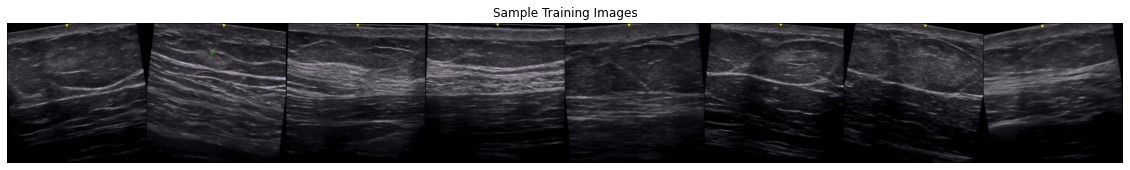

In [122]:
# plot the samples
plt.figure(figsize=(20, 8)); plt.axis("off"); plt.title("Sample Training Images")
plt.imshow(np.transpose(utils.make_grid(imgs, padding=1, normalize=True),(1, 2, 0)));

In [123]:
# apply a transformation to improve the contrast 
comb = [transforms.functional.adjust_contrast(i, contrast_factor = 1.5) for i in imgs]

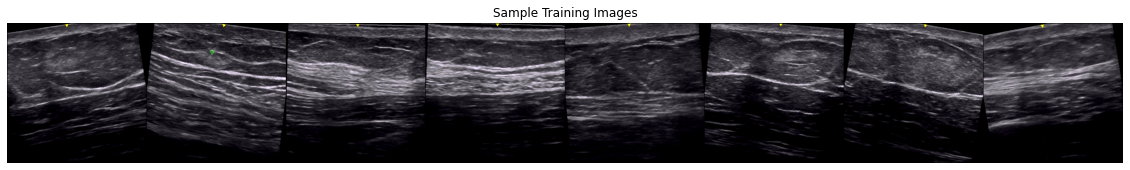

In [124]:
# plot the samples
plt.figure(figsize=(20, 8)); plt.axis("off"); plt.title("Sample Training Images")
plt.imshow(np.transpose(utils.make_grid(comb, padding=1, normalize=True),(1, 2, 0)));

This may not be what we need as it highlights the striations pattern more than anything. 